# Philadelphia Crime Data
Este es un análisis acerca de los crimenes en la ciudad de Philadelphia entre los años 2006 y 2017

![](https://wikitravel.org/upload/shared//4/47/Philadelphia_Banner.jpg)

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
from dateutil import parser
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import folium  #!pip3 import folium

# Import Data

In [2]:
datos = pd.read_csv('../datasets/crime.csv')

In [3]:
#Agregamos la columna Year
datos['Year'] = datos['Month'].apply(lambda row: row.split('-')[0])  
#Toma los valores de Month y los divide usando el separador '-' y seleccionamos el primer índice que 
#corresponde al año

In [4]:
datos.head(4)

,Dc_Dist,Psa,Dispatch_Date_Time,Dispatch_Date,Dispatch_Time,Hour,Dc_Key,Location_Block,UCR_General,Text_General_Code,Police_Districts,Month,Lon,Lat,Year
0,18,3,2009-10-02 14:24:00,2009-10-02,14:24:00,14,200918067518,S 38TH ST / MARKETUT ST,800.0,Other Assaults,NaN,2009-10,NaN,NaN,2009
1,14,1,2009-05-10 00:55:00,2009-05-10,00:55:00,0,200914033994,8500 BLOCK MITCH,2600.0,All Other Offenses,NaN,2009-05,NaN,NaN,2009
2,25,J,2009-08-07 15:40:00,2009-08-07,15:40:00,15,200925083199,6TH CAMBRIA,800.0,Other Assaults,NaN,2009-08,NaN,NaN,2009
3,35,D,2009-07-19 01:09:00,2009-07-19,01:09:00,1,200935061008,5500 BLOCK N 5TH ST,1500.0,Weapon Violations,20.0,2009-07,-75.130477,40.036389,2009


De acuerdo a los datos con los que contamos nos plateamos un objetivo del análisis y preguntas a responder.

## Objetivo
Analizar los crímenes de Filadelfia ocurridos dentro del periodo 2006 al 2017 mediante técnicas de Data Science para facilitar la  interpretación de los datos 

### Interrogantes a resolver
1. ¿ Cuál es el crimen mas común ?
- ¿ Cuál es la localización mas criminalística ?
- ¿ Cuál es el año con más crimenes ?
- ¿ Cuál es el flujo del crimen en el tiempo ? 
- ¿ Cuál es el intervalo de tiempo donde se cometen mas crimenes en el día ?

In [5]:
#Creamos una tabla agrupando dos columnas del dataset: 'datos', 
grupoCrimenes = pd.DataFrame({'count' : datos.groupby(['UCR_General', 'Text_General_Code']).size()})\
                .reset_index()
grupoCrimenes.head(8)

,UCR_General,Text_General_Code,count
0,100.0,Homicide - Criminal,3442
1,100.0,Homicide - Gross Negligence,12
2,100.0,Homicide - Justifiable,42
3,200.0,Rape,11852
4,300.0,Robbery Firearm,40577
5,300.0,Robbery No Firearm,51919
6,400.0,Aggravated Assault Firearm,27934
7,400.0,Aggravated Assault No Firearm,68989


Ahora lo que hacemos es que me traiga el máxima valor en la cantidad de crimenes cometidos

In [6]:
conteoMaximoCrimenes = grupoCrimenes['count'].max()
conteoMaximoCrimenes

437581

### 1. ¿Cuál es el crimen más común?

In [7]:
grupoCrimenes[grupoCrimenes['count'] == conteoMaximoCrimenes]

,UCR_General,Text_General_Code,count
32,2600.0,All Other Offenses,437581


Y los 5 más frecuentes:

In [8]:
#Me organiza de mayor a menor frecuencia
grupoCrimenes.sort_values('count',ascending = False).head()

,UCR_General,Text_General_Code,count
32,2600.0,All Other Offenses,437581
14,800.0,Other Assaults,277332
11,600.0,Thefts,257923
20,1400.0,Vandalism/Criminal Mischief,200345
10,600.0,Theft from Vehicle,171135


### De forma gráfica

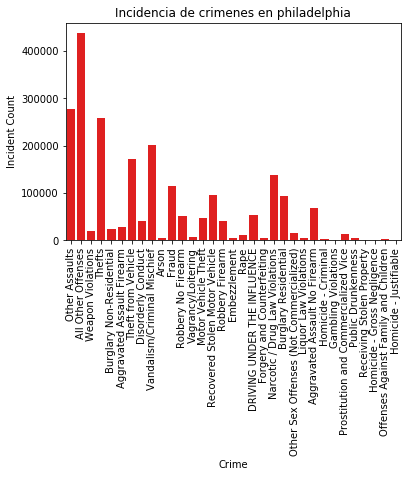

In [9]:
# Which crimes are most frequently committed?
sns.countplot(datos['Text_General_Code'], color='red')
plt.title("Incidencia de crimenes en philadelphia")
plt.xlabel("Crime")
plt.ylabel("Incident Count")
plt.xticks(rotation=90)
plt.show()

### 2. ¿ Cual es la localizacion más criminalística ?

In [10]:
grupoDistrito = pd.DataFrame({'count' : datos.groupby( ['Dc_Dist'] ).size()}).reset_index()

In [11]:
conteoMaximoDistrito = grupoDistrito['count'].max()

In [12]:
grupoDistrito[grupoDistrito['count'] == conteoMaximoDistrito]

,Dc_Dist,count
11,15,184677


### Cordenadas de la zona mas criminalistica

In [13]:
distrito = datos[datos['Dc_Dist'] == 15]

In [14]:
Lon = distrito['Lon'].min()
Lat = distrito['Lat'].max()
print('Latitud {:.7f}\nLongitud {}'.format(Lat, Lon))

Latitud 40.1008220
Longitud -75.238342


In [15]:
mapa = folium.Map(location=[40.1008220, -75.238342], zoom_start=18)
mapa

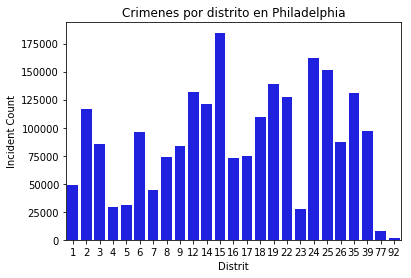

In [16]:
sns.countplot(datos['Dc_Dist'], color='blue')
plt.title("Crimenes por distrito en Philadelphia")
plt.xlabel("Distrit")
plt.ylabel("Incident Count")
plt.show()

### 3. El año con más crimenes

In [17]:
grupoYear = pd.DataFrame({'count' : datos.groupby( ['Year']).size()}).reset_index()
grupoYear

,Year,count
0,2006,234755
1,2007,223902
2,2008,223735
3,2009,205044
4,2010,199415
5,2011,195521
6,2012,196755
7,2013,186489
8,2014,186146
9,2015,183300


In [18]:
conteoCrimenesYear = grupoYear['count'].max()

In [19]:
grupoYear[grupoYear['count'] == conteoCrimenesYear]

,Year,count
0,2006,234755


In [20]:
grupoYear.sort_values('count',ascending = False)

,Year,count
0,2006,234755
1,2007,223902
2,2008,223735
3,2009,205044
4,2010,199415
6,2012,196755
5,2011,195521
7,2013,186489
8,2014,186146
9,2015,183300


### 4. ¿ Cual es el fujo del crimen en el tiempo ?

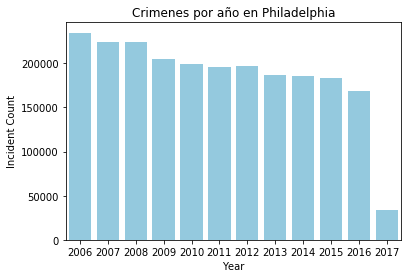

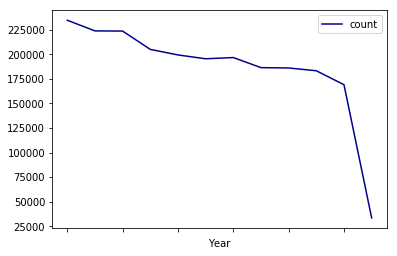

In [21]:
sns.countplot(datos['Year'], color='skyblue')
plt.title("Crimenes por año en Philadelphia")
plt.xlabel("Year")
plt.ylabel("Incident Count")
plt.show()
grupoYear.plot(x = 'Year', color='darkblue' )

### 5. ¿ Cuál es el intervalo de tiempo donde se cometen más crimenes en el día ?

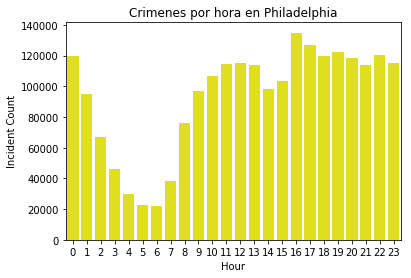

In [22]:
sns.countplot(datos['Hour'], color='yellow')
plt.title("Crimenes por hora en Philadelphia")
plt.xlabel("Hour")
plt.ylabel("Incident Count")
plt.show()